In [1]:

Use a machine language algorithm to find distinct groups or clusters within selected dataset , here we will make use of Kmean Clustering.

In [ ]:
import pandas as pd
import wbgapi as wb
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [184]:
country_codes = ['EGY','MDG','NGA','IND','JPN','QAT','ITA','ESP','FRA','DEU']

In [200]:
# write your code here

# indicators for getting data related to specified indicator
indicator_ids= ['FI.RES.TOTL.CD','NY.GDP.PCAP.CD','SP.POP.GROW','PA.NUS.FCRF','NY.GDP.PETR.RT.ZS']

# mapping a readable name to each indicators to avoid confusion
indicator_dict = {
    'FI.RES.TOTL.CD':'TOTAL_RESERVE',
    'NY.GDP.PCAP.CD':'GDP',
    'SP.POP.GROW' : 'POPULATION',
    'PA.NUS.FCRF':'EXCHANGE_RATE',
    'NY.GDP.PETR.RT.ZS':'OIL_RENT',
}

In [201]:
wb.series.info(indicator_ids)

id,value
NY.GDP.PCAP.CD,GDP per capita (current US$)
PA.NUS.FCRF,"Official exchange rate (LCU per US$, period average)"
NY.GDP.PETR.RT.ZS,Oil rents (% of GDP)
SP.POP.GROW,Population growth (annual %)
FI.RES.TOTL.CD,"Total reserves (includes gold, current US$)"
,5 elements


In [208]:
def read_worldbank(indicators,countries,starttimerange,endtimerange):
    """ Read world banks data, and return both raw data frame and 
    a transposed data frame with edited index or columns names
    """ 
    raw_df  = wb.data.DataFrame(indicator_ids, countries, time=range(starttimerange, endtimerange))
    df = raw_df
    df.reset_index()
    df = df.reset_index(level=['economy', 'series'])
    df = df.set_index('series')
    df = df.rename(index=indicator_dict)
    df = df.reset_index(level=['series'])
    df = df.set_index(['economy','series'])
    stacked = df.stack()
    df = stacked.unstack('series')
    return raw_df,df

In [209]:
raw_df,df = read_worldbank(indicator_ids, country_codes,1980, 2015)
df.head()

series          EXCHANGE_RATE           GDP  OIL_RENT  POPULATION  \
economy                                                             
DEU     YR1980       1.817667  12138.308103  0.066456    0.207430   
        YR1981       2.260000  10209.073115  0.058495    0.152308   
        YR1982       2.426592   9913.737642  0.031714   -0.095113   
        YR1983       2.553258   9864.344940  0.045618   -0.262153   
        YR1984       2.845942   9313.169412  0.050022   -0.345666   

series          TOTAL_RESERVE  
economy                        
DEU     YR1980   1.047017e+11  
        YR1981   8.155365e+10  
        YR1982   8.825023e+10  
        YR1983   7.898615e+10  
        YR1984   6.948515e+10

Normalize data

In [210]:
df = norm_df(df)

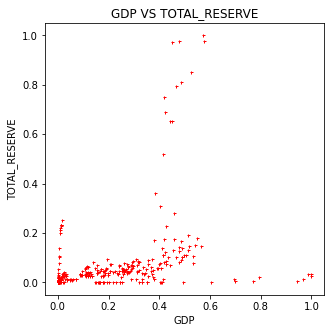

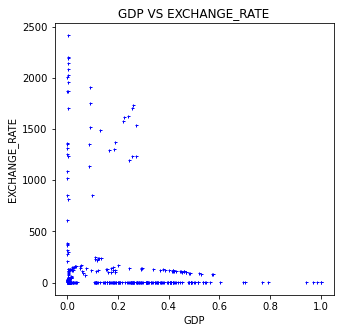

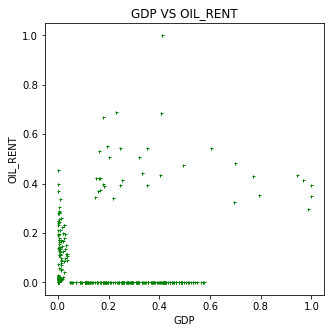

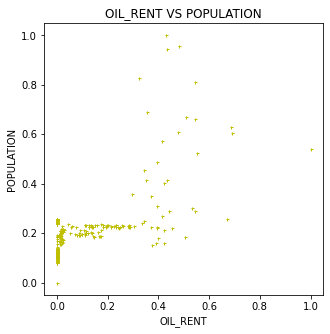

In [211]:
def plotGraph(df, col1, col2, color):
    """
    Produces a square plot of two columns of dataframe df using small plus 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "+", markersize=3, color=color)
    
    plt.title(col1 + " VS " + col2)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
#plots
plotGraph(df, "GDP", "TOTAL_RESERVE", "r")
plotGraph(df, "GDP", "EXCHANGE_RATE","b")
plotGraph(df, "GDP", "OIL_RENT","g")
plotGraph(df, "OIL_RENT", "POPULATION","y")

Make use of Kmeans clustering to cluster datasets

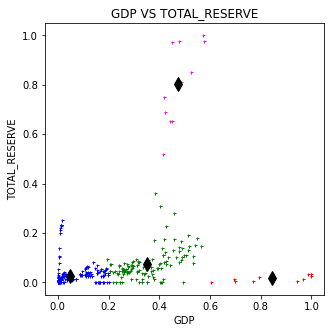

In [212]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df[["GDP", "TOTAL_RESERVE"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["GDP"][labels==l], df_fit["TOTAL_RESERVE"][labels==l], "+", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.title("GDP VS TOTAL_RESERVE")    
plt.xlabel("GDP")
plt.ylabel("TOTAL_RESERVE")
plt.show()